<a href="https://colab.research.google.com/github/Playerjb/Reconhecimento_de_Personalidade/blob/main/Notebooks/Reconhecimento_de_Personalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

## **Alimentar o DataFrame**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MachineLearning/data-final.csv",sep="\t")

In [ ]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


Mantem apenas as colunas referentes as questões, removendo as demais

In [ ]:
data.drop(data.columns[50:110], axis=1, inplace=True)

## **Analise estatistica da basa de dados**


In [ ]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Note que há um ruído nos dados, uma vez que o valor minimo encontrado, foi o 0, sendo que o dado vai de 1 a 5.

### Quantidade de registros por valor/resposta

In [ ]:
data["EXT1"].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

### Apagar registros com o valor 0

Visualizar os registros iguais a zero

In [ ]:
data[(data == 0.00).all(axis=1)].head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
485,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1168,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2407,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2619,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2641,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Manter apenas os registros maiores que zero

In [ ]:
data = data[(data > 0.00).all(axis=1)]

### Quantidade de registros por valor/resposta após ajuste da Data Base

In [ ]:
data["EXT1"].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

## **Agrupamento de dados similares**

Tendo em vista que a nossa "regra de negócio" se trata de entender traços de personalidade, e que nesta base temos 5 traços fortes de personalidade, isso nos indica que deveremos ter 5 grupos, sendo um para cada um destes traços, permitindo o algoritimo distinguir por estes grupos.

Instalar a API yellowbrick para visualização exploratória

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bibliotecas do yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Instanciando os métodos

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10)) #K = Numero de agrupamentos que queremos | kmeans = Algoritimo a ser utilizado

Amostra aleatória com 5000 observações

In [ ]:
data_sample = data.sample(n=5000, random_state=1)

### **Teste pela amostragem**

Vamos identificar a quantidade de grupos/clusters ideal para o nosso projeto a partir do método Elbow

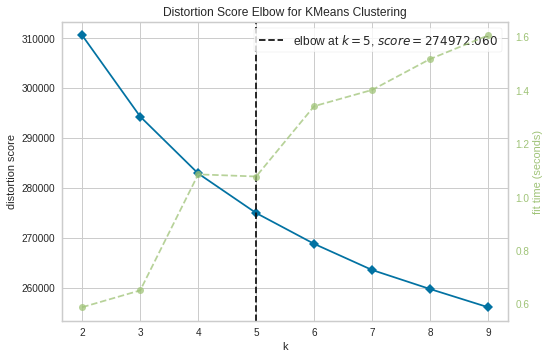

In [ ]:
visualizer.fit(data_sample) #Executa o treino
visualizer.poof() #Exibe o gráfico com os clusters

Observe que o algoritimo nos retornou ser indicado para o nosso caso, utilizar 5 agrupamentos, conforme já haviamos estabelecido/identificado atráves da regra de negócio do nosso projeto

### **Atribuindo os participantes em 5 grupos**

In [ ]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

Inserir os rótulos dos clusters no DataFrame

In [ ]:
predicoes = k_fit.labels_ #Pega os rótulos/IDs dos grupos gerados
data['Clusters'] = predicoes #Insere uma nova coluna no DataFrame com essa informação

In [ ]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,0
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,0
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


## **Análise dos grupos**

Quantidade de observações por grupo

In [ ]:
data["Clusters"].value_counts()

3    192966
1    182827
0    180878
4    169774
2    147989
Name: Clusters, dtype: int64

Agrupando os registros por grupo

In [ ]:
data.groupby("Clusters").mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.14,3.27,3.11,3.64,3.00,2.69,2.24,3.99,2.33,4.12,3.59,3.05,4.20,2.60,2.87,2.87,2.92,2.49,3.02,2.75,1.85,3.98,1.68,4.39,1.96,4.19,1.99,4.01,4.20,3.73,3.86,2.21,4.30,2.03,3.25,2.06,4.18,2.02,3.86,3.90,3.56,2.17,3.88,2.08,3.71,1.99,4.00,2.96,4.27,3.79
1,3.46,1.96,4.33,2.24,4.26,1.68,3.87,2.82,3.74,2.53,2.32,3.85,3.14,3.32,2.11,1.90,2.10,1.67,2.11,1.71,1.89,4.44,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.58,4.20,1.89,3.14,2.27,3.88,1.94,3.59,3.89,3.91,1.75,4.09,1.79,4.16,1.66,4.33,3.25,4.11,4.29
2,2.15,3.45,2.81,3.59,2.61,2.87,2.12,3.72,2.69,4.00,2.43,3.73,3.13,3.00,2.39,2.09,2.38,1.99,2.68,2.37,3.06,3.01,2.64,2.89,3.25,2.78,3.12,2.97,2.71,3.09,3.29,2.91,3.83,2.47,2.44,2.81,3.55,2.58,2.89,3.52,3.73,1.96,3.79,2.05,3.79,2.05,4.09,3.30,3.92,3.84
3,3.46,1.91,3.81,2.49,4.07,1.81,3.67,2.75,3.79,2.99,3.81,2.96,4.24,2.43,3.27,3.47,3.80,3.44,3.64,3.17,2.14,4.30,2.66,4.19,2.00,4.01,1.85,3.91,4.13,3.86,2.98,3.63,3.85,3.25,2.22,3.54,3.46,2.84,2.94,3.49,3.79,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21
4,1.81,3.63,2.23,4.06,2.30,3.18,1.75,4.08,2.18,4.48,4.29,2.46,4.52,2.13,3.57,3.90,4.01,3.78,4.01,3.96,2.46,3.38,2.59,3.85,2.56,3.87,2.71,3.44,3.68,3.06,2.81,3.39,3.81,3.51,2.07,3.52,3.56,3.06,2.76,3.31,3.52,2.38,4.08,2.12,3.43,2.09,3.69,3.19,4.29,3.73


### Calcular a média por grupo de questões em busca de um padrão

O DataFrame contém grupos de questões, na qual cada 10 questões, fazem parte de um mesmo grupo. Para uma melhor análise, agruparemos as questões

In [ ]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

Somando os valores de cadas grupo

In [ ]:
data_soma = pd.DataFrame()
data_soma["Extrovertido"] = data[ext].sum(axis=1)/10
data_soma["Neurotic"] = data[est].sum(axis=1)/10
data_soma["Agradavel"] = data[agr].sum(axis=1)/10
data_soma["Consciencioso"] = data[csn].sum(axis=1)/10
data_soma["Aberto"] = data[opn].sum(axis=1)/10
data_soma["Clusters"] = predicoes

Calculando a média de cada traço de personalidade por grupo

In [ ]:
data_clusters = data_soma.groupby("Clusters").mean()

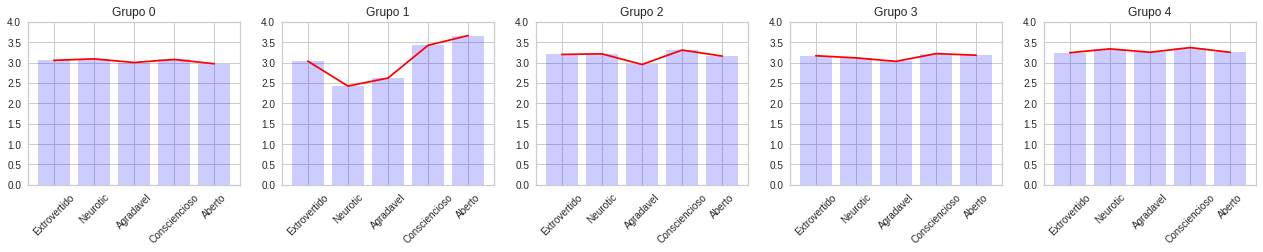

In [ ]:
plt.figure(figsize=(22,3))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.bar(data_clusters.columns, data_clusters.iloc[:,i], color="blue", alpha=0.2)
  plt.plot(data_clusters.columns, data_clusters.iloc[:,i],color="red")
  plt.title("Grupo "+str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4)

## **Interface para imputar dados**

### Forma mais simples

Criar planilha a partir das colunas do nosso DataFrame para armazenar os dados 

In [ ]:
data[:0].to_excel("/content/drive/MyDrive/MachineLearning/perguntas.xlsx", index=False)

Recuperando os dados inseridos na planilha

In [ ]:
new_dados = pd.read_excel("/content/drive/MyDrive/MachineLearning/perguntas.xlsx")

Passando os dados para o modelo já treinado

In [ ]:
gp_personalidade = k_fit.predict(new_dados)[0]
print("Sua personalidade é do grupo: ", gp_personalidade)

Sua personalidade é do grupo:  2


In [ ]:
np.any(np.isnan(new_dados))

False

In [ ]:
np.all(np.isfinite(new_dados))

False

### Forma mais complexa

Vamos utilizar a biblioteca Gradio, na qual permitira que publiquemos de forma pública nossa interface para que o usuário responda as perguntas

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

Pegando as questões do arquivo 

In [ ]:
list_questions = open("/content/drive/MyDrive/MachineLearning/codebook.txt").read().split("\n")

Limpando os dados e recuperando apenas as questões

In [ ]:
perguntas = []
for lin in list_questions:
  lin = str(lin)
  perguntas.append(lin[lin.find("\t"):].lstrip()) #Pega apenas os caracteres após o indice encontrado com o valor "\t", apagando os valores em branco no inicio e fim com o "lstrip"

In [ ]:
perguntas

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

Criando os inputs dinamicos

In [ ]:
inputs = []
for questao in perguntas:
  obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=questao)
  inputs.append(obj_input)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
def predict(*outputs_questions): #recebe uma lista de valores
  outputs_questions = np.array(outputs_questions).reshape(1,-1)
  return k_fit.predict(outputs_questions)

iface = gr.Interface(
    fn = predict, #Função a ser chamada
    title = "Reconhecimento de Personalidade", #Titulo da interface
    desrciption = "Detecção de traços de personalidade", #Descrição da interface
    inputs = inputs, #Sliders para pegar os dados
    outputs = "text" #Tipo de dado a ser recebido
)

iface.launch(share=True) #Gera um IP público para compartilhamento

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:44: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'desrciption': 'Detecção de traços de personalidade'}
  f"You have unused kwarg parameters in {cls}, please remove them: {kwargs}"


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://16608.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fc482c04f50>,
 'http://127.0.0.1:7861/',
 'https://16608.gradio.app')

## **Referência**

STACK. Projeto Prático de Machine Learning para Portfólio | Data Science com Python. Youtube, 27/04/2021. Disponivel em: https://www.youtube.com/watch?v=b3YwX9q-pDQ. 